# Homework 2

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


# 1. Fridge Light Failure

Imagine that you work for a company that sells fridges, with a lifetime warranty for the fridge lights. Your boss is interested in understanding the distribution of the number of lights that will fail in a given month, based on data collected over the last several years. The data were collected by hand and manually entered, so data entry errors are possible. There are also some months with missing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import zscore
from scipy.special import factorial
import scipy.optimize as so

In [ ]:
# Uncomment the line below if you are using Google colab
# !gdown https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF

1. Read the CSV file using Pandas and store it. All you've been given are a meaningless ID and the counts of the number of fridge lights that failed in each month.

In [2]:
url = 'https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF'
df = pd.read_csv(url)

2. Count the number of null values in the dataset, then remove them.

In [3]:
# Count the number of null values in each column
null_counts = df.isnull().sum()
print("Null values per column:")
print(null_counts)

Null values per column:
ID    0
x     4
dtype: int64


In [4]:
# Remove rows with null values
df_cleaned = df.dropna()

Number of null values: 4

3. Plot the distribution of the data. Add a title and axes labels to your plot.

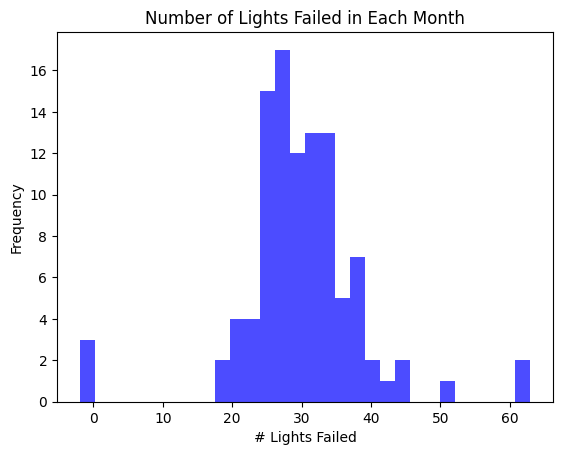

In [9]:
plt.hist(df['x'], bins=30, alpha=0.7, color='blue')
plt.title("Number of Lights Failed in Each Month")
plt.xlabel("# Lights Failed")
plt.ylabel("Frequency")
plt.show()

4. Count the number of observations that you know with **certainty** are data entry errors, then remove them. Explain why you know they are errors.

In [19]:
# Removing rows where any value in the dataframe is negative
errors , n = df.loc[df['x'] < 0].shape
print(errors)
df = df[(df >= 0).all(axis=1)]

0


Number of certain data entry errors = 3 because negative entries are impossible for this situation

5. Compute the negative log-likelihood based on the assumption that the data comes from a Poisson($\lambda$) distribution. The negative log-likelihood for a Poisson($\lambda$) distribution is as follows:

$$
nll(\lambda) = n \lambda - \left(\sum_{i=1}^{n}x_i\right) log(\lambda) + \sum_{i=1}^{n}log(x_i!)
$$

In [15]:
#test your function on a dummy dataset with lambda = 25

def poissonNegLogLikelihood(lam, x):
    n = len(x)
    nll = n * lam - np.sum(x) * np.log(lam) + np.sum(np.log(factorial(x)))
    return nll

dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
poissonNegLogLikelihood(25, dummy_data.x)



31.189286095130285

6. Consider integer values of $\lambda$ ranging from 10 to 50. Compute the negative log-likelihood for each of these values and plot it. Include a title and axes labels on your plot. Based on the plot, what value of $\lambda$ is most likely to have generated the data? You may give a small range.

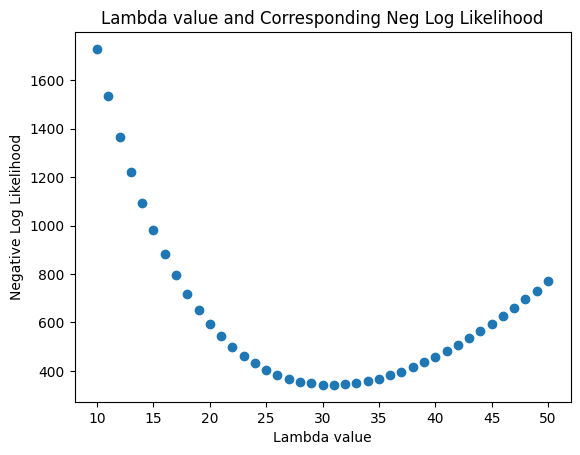

In [16]:
rangedata = df['x'].astype(int)
lmd = np.arange(10,51)
for i in range(0, lmd.size):
  lmd[i] = poissonNegLogLikelihood(lmd[i], rangedata)

plt.scatter(np.arange(10, 51, 1), lmd)

plt.xlabel("Lambda value")
plt.ylabel("Negative Log Likelihood")
plt.title("Lambda value and Corresponding Neg Log Likelihood")

plt.show()

Value of $\lambda$ most likely to have generated the data: __

7. Compute the negative log-likelihood based on the assumption that the data comes from a Normal($\mu$, $\sigma$) distribution. The negative log-likelihood for a Normal($\mu$, $\sigma$) distribution is as follows:

$$
nll(\mu, \sigma) = \frac{n}{2}log(2π) + \frac{n}{2}log(\sigma^2) + \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2
$$

In [17]:
def normalNegLogLikelihood(params, x):
  n = len(x)
  nll = (n/2) * np.log(2 * np.pi) + (n/2) * np.log(params[1]**2) + (1/(2 * params[1]**2)) * np.sum((x - params[0])**2)
  return nll

#test your function on a dummy dataset with mu = 25, sigma = 3
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
normalNegLogLikelihood([25, 3], dummy_data.x)

50.809976331586135

8. Determine the exact value of $\lambda$ that minimizes the negative log-likelihood for the Poisson distribution. Use so.minimize with method="Powell" and without a Jacobian.

In [22]:

data = df['x']
data = data.astype(int)

# Minimize the negative log-likelihood using the Powell method
result = so.minimize(poissonNegLogLikelihood, np.mean(data), args=(data,), method="Powell")

# Print the optimized value of lambda
print(f"Optimized lambda: {result.x[0]}")

Optimized lambda: 30.820000022097926


Value of $\lambda$ that minimizes the negative log-likelihood:30.820000022097926

9. Determine the set of values of $\mu$ and $\sigma$ that minimizes the negative log-likelihood for the Normal distribution.

In [23]:
# Initial guess for mu and sigma
initialGuess = [np.mean(data), np.mean(data)/3]

# Minimize the negative log-likelihood using the Powell method
result_normal = so.minimize(normalNegLogLikelihood, initialGuess, args=(data,), method="Powell")

# Print the optimized values of mu and sigma
mu_opt, sigma_opt = result_normal.x
print(f"Optimized mu: {mu_opt}")
print(f"Optimized sigma: {sigma_opt}")

Optimized mu: 30.819999904728007
Optimized sigma: 7.348999076311349


Values for $\mu$ and $\sigma$ that minimize the negative log-likelihood: 30.8, 7.3


10. There are three data entry errors that could potentially be valid entries. Which three are most likely to be data entry errors? Identify them by their value (i.e., not their index in the data).

Three most likely data entry errors: 63, 61, and 52

11. Remove the three observations that you think are most likely to be data entry errors. Determine the parameters that minimize the negative log-likelihoods for the Poisson($\lambda$) and Normal($\mu$, $\sigma$) distributions. Do your results change in a meaningful way?

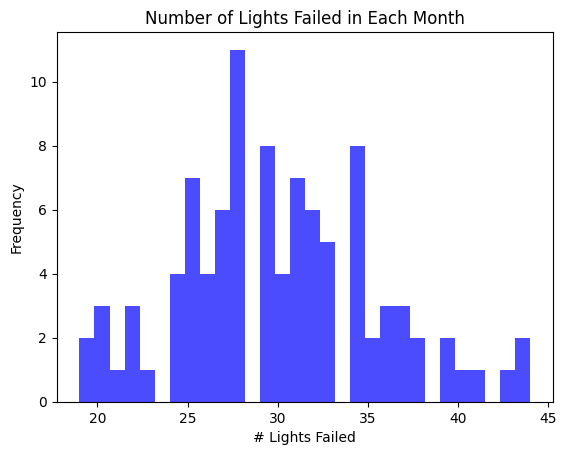

Optimized lambda: 29.95876296774862
Optimized mu: 29.958762892189903
Optimized sigma: 5.4996111221830075


In [28]:
df = df.loc[df['x'] <= 50]
data = df['x'].astype(int)

plt.hist(df['x'], bins=30, alpha=0.7, color='blue')
plt.title("Number of Lights Failed in Each Month")
plt.xlabel("# Lights Failed")
plt.ylabel("Frequency")
plt.show()

initialGuessP = np.mean(data)
result = so.minimize(poissonNegLogLikelihood, initialGuessP, args=(data,), method="Powell")
print(f"Optimized lambda: {result.x[0]}")

initialGuessN = [np.mean(data), np.mean(data)/3]
result_normal = so.minimize(normalNegLogLikelihood, initialGuessN, args=(data,), method="Powell")
mu_opt, sigma_opt = result_normal.x

print(f"Optimized mu: {mu_opt}")
print(f"Optimized sigma: {sigma_opt}")


Because a smaller standard deviation means less variability, the 1.85 difference is significant.

12. Between the Poisson and Normal models, which one do you think is best to use to represent the data? Why? Provide your answer in no more than two lines.

The Poisson model is likely better for this data if the values represent counts or events occurring over time, as the Poisson distribution is suited for modeling such discrete, non-negative data. The Normal model may not be appropriate if the data are skewed or discrete